In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [139]:
def get_lines(img):
    
    img_r = img[:,:,0] - img[:,:,0]
    img_g = img[:,:,1] - img[:,:,0]
    img_b = img[:,:,2] - img[:,:,0]
    
    return np.clip(np.dstack((img_r,img_g,img_b)),a_min = 0,a_max = 1)

def get_lines_BGR(img):
    
    img_b = img[:,:,0] - np.mean(img, axis = 2)
    img_g = 0*img[:,:,0] #img[:,:,1] - img[:,:,2]
    img_r = 0*img[:,:,0]#img[:,:,2] - img[:,:,2]
    
    return np.clip(np.dstack((img_r,img_g,img_b)),a_min = 0,a_max = 255).astype(np.uint8);


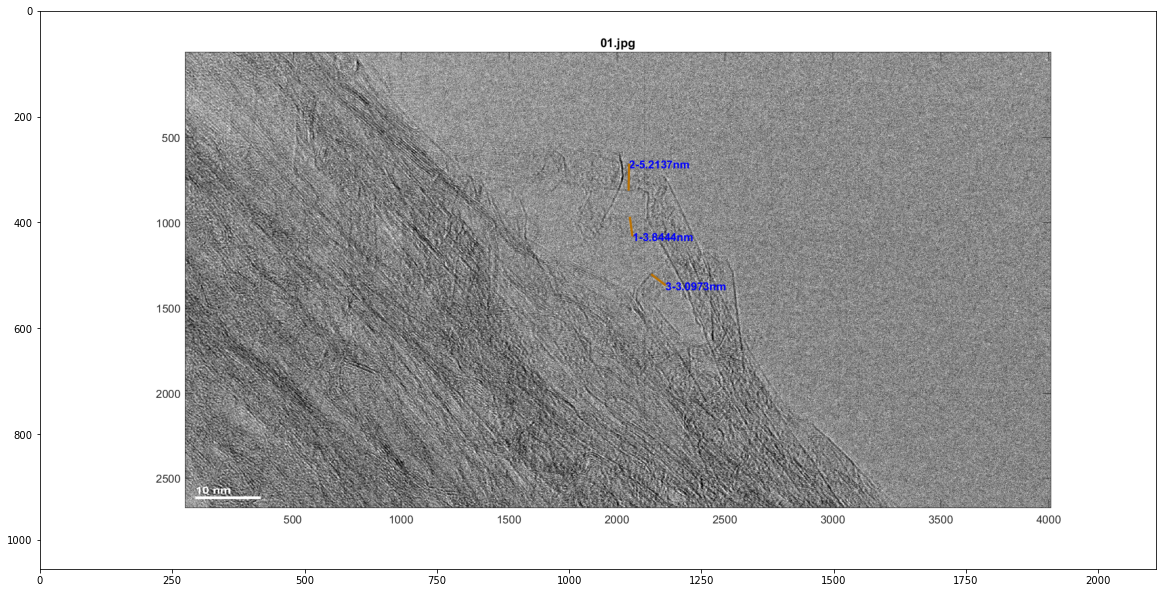

In [169]:
img = cv2.imread('../cnt_data/TEM-2018-01-05/LX0104R1-FMES120-120kV/Measurments/meas1.tif')


plt.figure(figsize = (20,16))
plt.imshow(img)

In [170]:
img = img.astype(np.uint8)

In [171]:
lines_bgr.astype(np.uint8).min()

0

In [172]:
#lines_bgr = get_lines_BGR(img);
#plt.figure(figsize = (20,16))
#plt.imshow(lines_bgr)

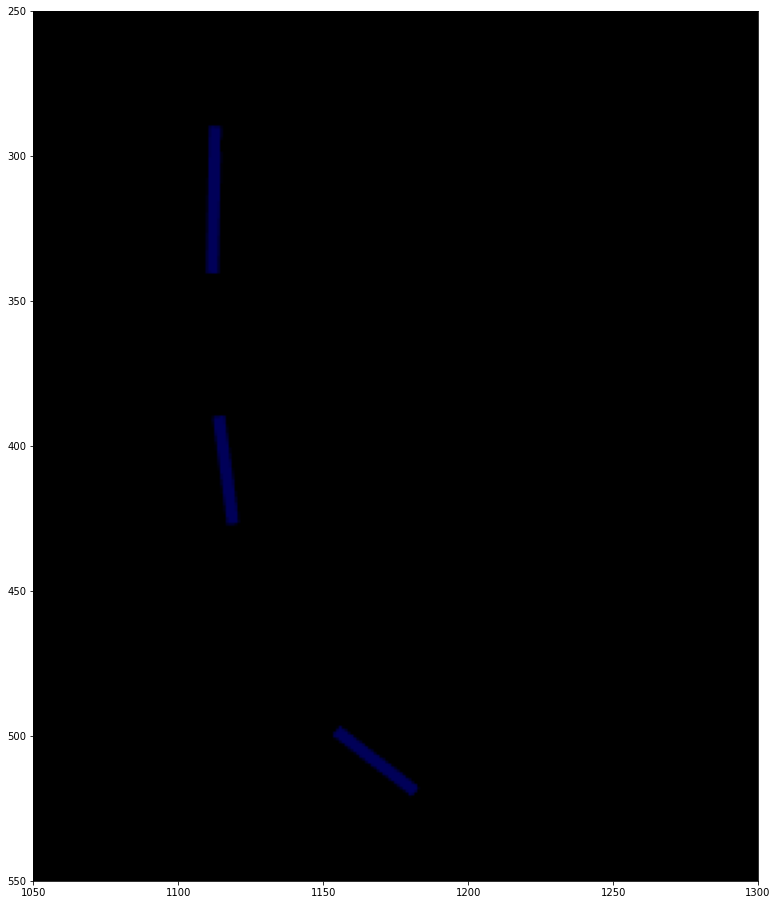

In [173]:
lines_bgr = get_lines_BGR(img);
plt.figure(figsize = (20,16))
plt.imshow(lines_bgr,vmax = (1))
plt.xlim(1050,1300)
plt.ylim(550,250)
plt.savefig('blue_lines.tif')

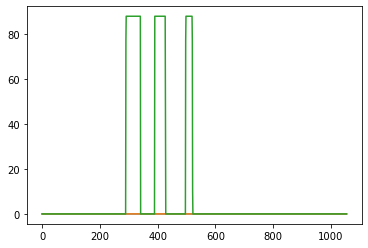

In [86]:
plt.plot(np.arange(lines_bgr.shape[0]),lines_bgr.max(axis = 1));

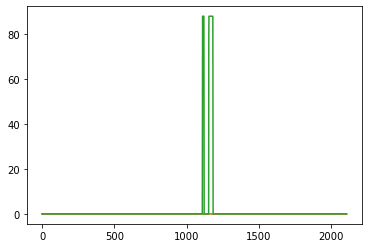

In [87]:
plt.plot(np.arange(lines_bgr.shape[1]),lines_bgr.max(axis = 0));

(1.0, 10.0)

<Figure size 1440x1152 with 0 Axes>

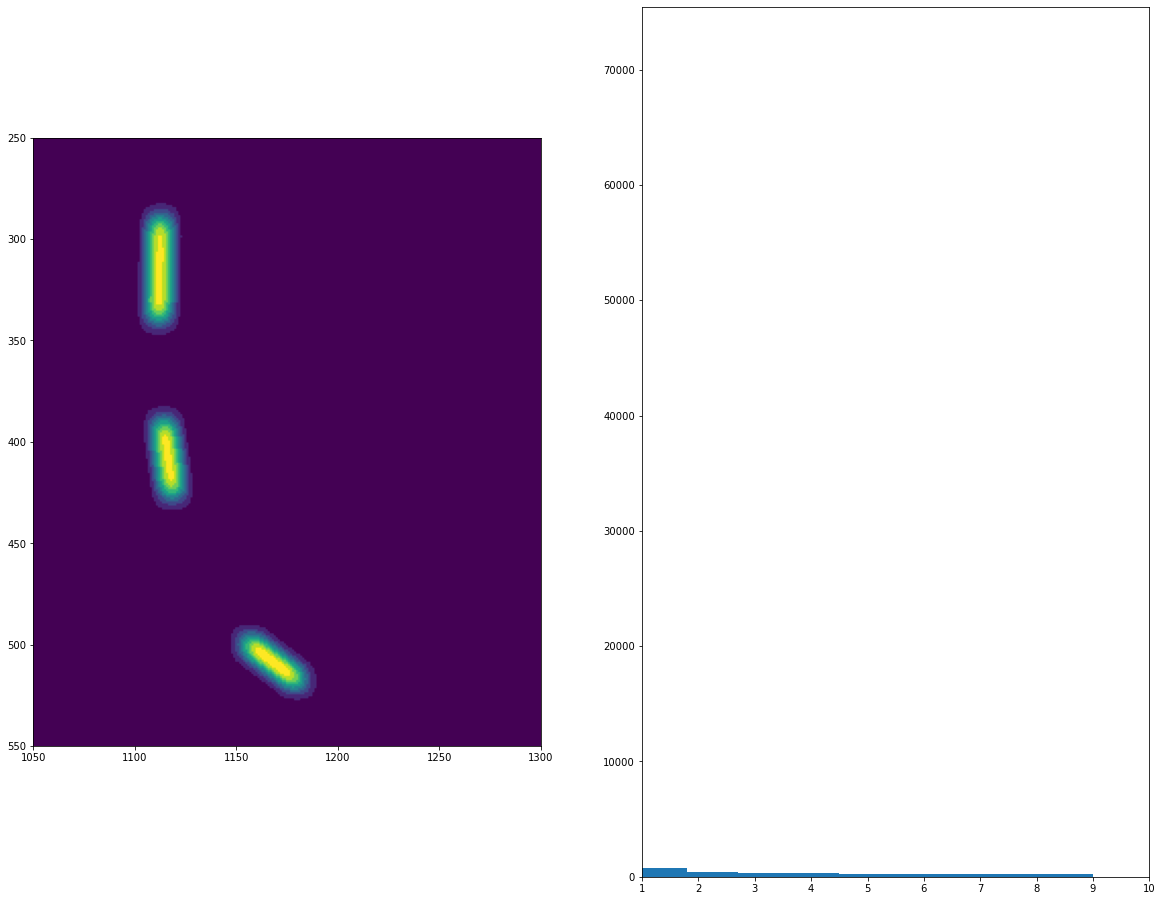

In [174]:
gray = cv2.cvtColor(lines_bgr,cv2.COLOR_BGR2GRAY)

kernel_size = 19
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),5)

plt.figure(figsize = (20,16))

f, ax = plt.subplots(1,2, figsize = (20,16))

ax[0].imshow(blur_gray)
ax[0].set_xlim(1050,1300)
ax[0].set_ylim(550,250)

ax[1].hist(blur_gray[250:550,1050:1300].ravel(), bins = 10)
ax[1].set_xlim([1,10])

(550.0, 250.0)

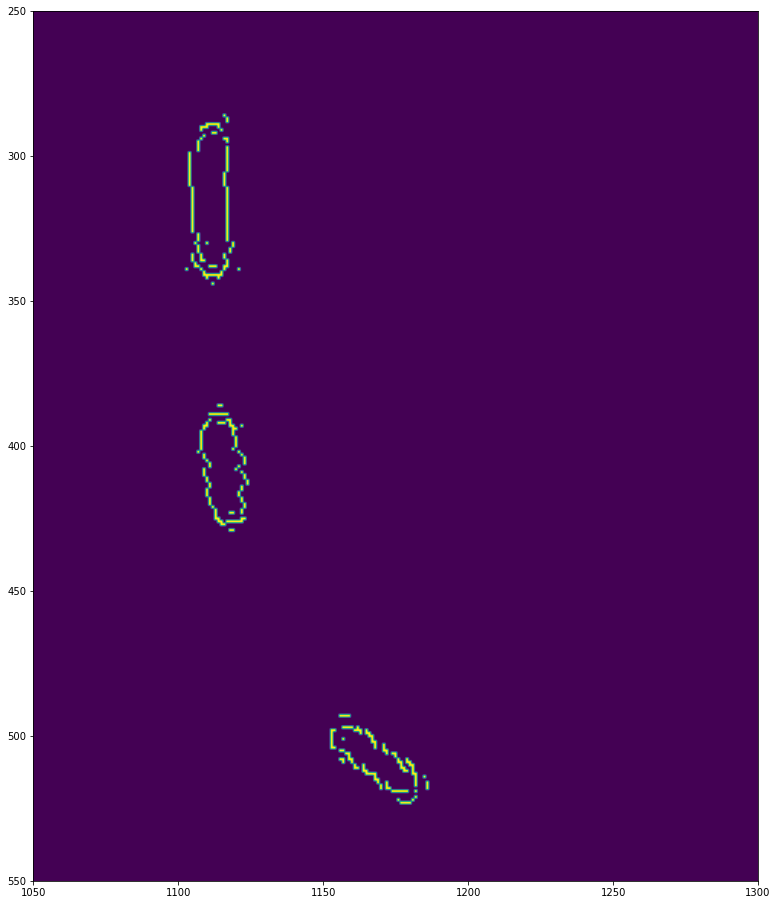

In [162]:
gray = cv2.cvtColor(lines_bgr,cv2.COLOR_BGR2GRAY)

kernel_size = 19
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),5)

edges = cv2.Canny(blur_gray,20,80,apertureSize = 5)

plt.figure(figsize = (20,16))
plt.imshow(edges)
plt.xlim(1050,1300)
plt.ylim(550,250)

In [149]:
np.random.rand()

0.20036183281236952

(550.0, 250.0)

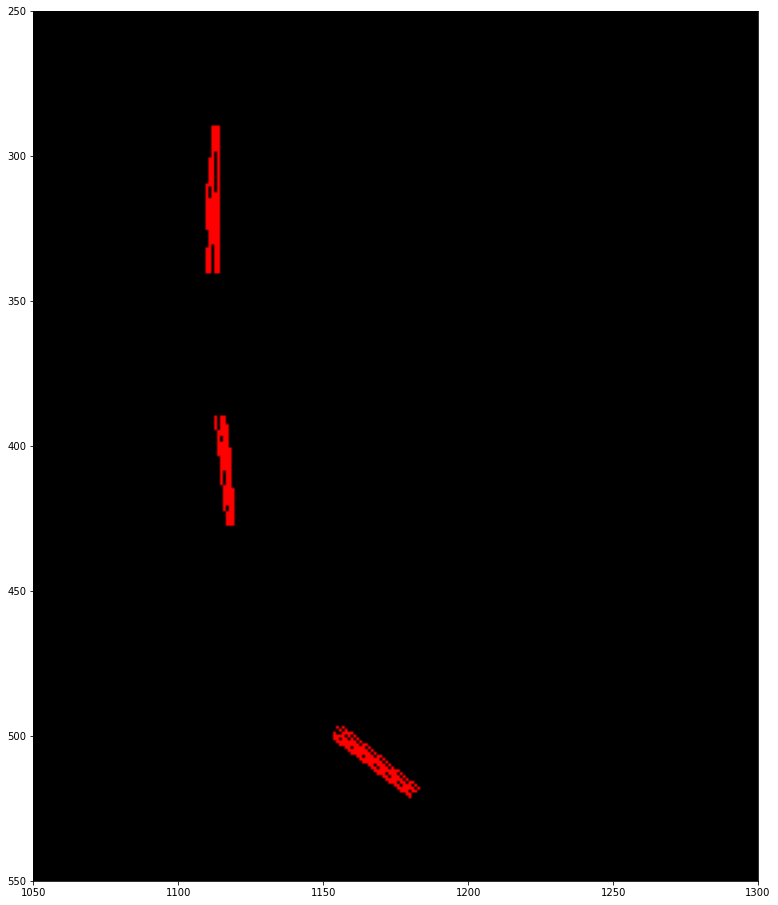

In [178]:
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 10  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = 0*img  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(gray, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)
for line in lines: 
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),1)

plt.figure(figsize = (20,16))
        
        
plt.imshow(line_image)
plt.xlim(1050,1300)
plt.ylim(550,250)
#plt.savefig('l')

In [180]:
lines

array([[[1114,  340, 1114,  290]],

       [[1112,  290, 1113,  335]],

       [[1111,  301, 1113,  340]],

       [[1115,  390, 1118,  427]],

       [[1155,  497, 1182,  519]],

       [[1110,  310, 1111,  340]],

       [[1113,  390, 1117,  427]],

       [[1154,  499, 1181,  519]],

       [[1118,  401, 1119,  427]],

       [[1157,  497, 1183,  518]],

       [[1154,  500, 1180,  520]],

       [[1110,  340, 1113,  290]],

       [[1117,  393, 1117,  412]],

       [[1115,  407, 1116,  390]],

       [[1118,  426, 1118,  404]],

       [[1154,  501, 1180,  521]],

       [[1157,  500, 1179,  517]]], dtype=int32)

In [182]:
lines[0][0]

array([1114,  340, 1114,  290], dtype=int32)

In [185]:
def line_ends(liens):
    
    ends

def line_centers(lines):
    
    centers = []
    
    for line in lines:
        x1,y1,x2,y2 = line[0]
        centers.append(((x1+x2)/2 ,(y1+y2)/2)) # centerpoint of line
        
    return centers

In [189]:
centers[0]

(1114.0, 315.0)

In [ ]:
centers = line_centers(lines)
plt.scatter(*zip(*centers)) # https://stackoverflow.com/questions/18458734/how-do-i-plot-list-of-tuples-in-python
plt.xlim(1050,1300)
plt.ylim(550,250)

(550.0, 250.0)

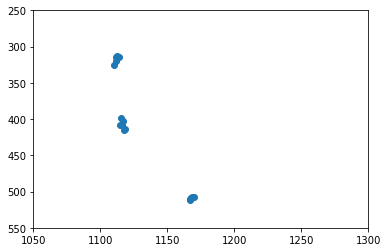

In [193]:
centers = line_centers(lines)
plt.scatter(*zip(*centers)) # https://stackoverflow.com/questions/18458734/how-do-i-plot-list-of-tuples-in-python
plt.xlim(1050,1300)
plt.ylim(550,250)

In [205]:
centers

[(1114.0, 315.0),
 (1112.5, 312.5),
 (1112.0, 320.5),
 (1116.5, 408.5),
 (1168.5, 508.0),
 (1110.5, 325.0),
 (1115.0, 408.5),
 (1167.5, 509.0),
 (1118.5, 414.0),
 (1170.0, 507.5),
 (1167.0, 510.0),
 (1111.5, 315.0),
 (1117.0, 402.5),
 (1115.5, 398.5),
 (1118.0, 415.0),
 (1167.0, 511.0),
 (1168.0, 508.5)]

In [214]:
from scipy.cluster.vq import kmeans2

clust = kmeans2(centers,k = 3)
clust[0]

array([[1112.66666667,  314.16666667],
       [1142.375     ,  458.41666667],
       [1111.25      ,  322.75      ]])

(550.0, 250.0)

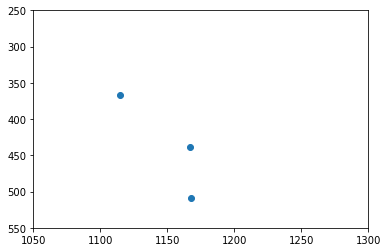

In [213]:
plt.scatter(*zip(*clust[0]))
plt.xlim(1050,1300)
plt.ylim(550,250)